In [ ]:
import pandas as pd
df=pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.fillna({
    'director': 'unknown director',
    'cast': 'unknown cast',
    'country': 'unknown country',
    'rating': 'unknown rating',
    'date_added': 'unknown date',
    'duration': 'unknown duration'
}, inplace=True)

In [ ]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df['cast'] = df['cast'].astype(str).str.split(', ')
df['director'] = df['director'].astype(str).str.split(', ')
df['listed_in'] = df['listed_in'].astype(str).str.split(', ')
df['country'] = df['country'].astype(str).str.split(', ')

In [ ]:
df_exploded = df.explode('cast')
df_exploded = df_exploded.explode('director')
df_exploded = df_exploded.explode('listed_in')
df_exploded = df_exploded.explode('country')

In [ ]:
df_exploded[['title', 'cast', 'director', 'listed_in', 'country']].head(15)

,title,cast,director,listed_in,country
0,Dick Johnson Is Dead,unknown cast,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,unknown director,International TV Shows,South Africa
1,Blood & Water,Ama Qamata,unknown director,TV Dramas,South Africa
1,Blood & Water,Ama Qamata,unknown director,TV Mysteries,South Africa
1,Blood & Water,Khosi Ngema,unknown director,International TV Shows,South Africa
1,Blood & Water,Khosi Ngema,unknown director,TV Dramas,South Africa
1,Blood & Water,Khosi Ngema,unknown director,TV Mysteries,South Africa
1,Blood & Water,Gail Mabalane,unknown director,International TV Shows,South Africa
1,Blood & Water,Gail Mabalane,unknown director,TV Dramas,South Africa
1,Blood & Water,Gail Mabalane,unknown director,TV Mysteries,South Africa


In [ ]:

print("1️ Type Count:")
print(df_exploded['type'].value_counts())
print("\n" + "-"*50)

print("2️ Top 10 Cast Members:")
print(df_exploded['cast'].value_counts().head(10))
print("\n" + "-"*50)
print("3️ Top 10 Directors:")
print(df_exploded['director'].value_counts().head(10))
print("\n" + "-"*50)
print("4️ Top 10 Genres:")
print(df_exploded['listed_in'].value_counts().head(10))
print("\n" + "-"*50)

print("5️ Top 10 Countries:")
print(df_exploded['country'].value_counts().head(10))
print("\n" + "-"*50)
print("6️ Rating Count:")
print(df_exploded['rating'].value_counts())

1️ Type Count:
type
Movie      145843
TV Show     56148
Name: count, dtype: int64

--------------------------------------------------
2️ Top 10 Cast Members:
cast
unknown cast        2146
Liam Neeson          161
Alfred Molina        160
John Krasinski       139
Salma Hayek          130
Frank Langella       128
Anupam Kher          127
John Rhys-Davies     125
Shah Rukh Khan       108
Naseeruddin Shah     106
Name: count, dtype: int64

--------------------------------------------------
3️ Top 10 Directors:
director
unknown director       50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
Lars von Trier           336
Raja Gosnell             308
Tom Hooper               306
McG                      293
David Dhawan             270
Name: count, dtype: int64

--------------------------------------------------
4️ Top 10 Genres:
listed_in
Dramas                      29775
International Movies        28211
Comedies       


=== ANALYSIS OF RATING ===

Top 10 Frequent Values:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


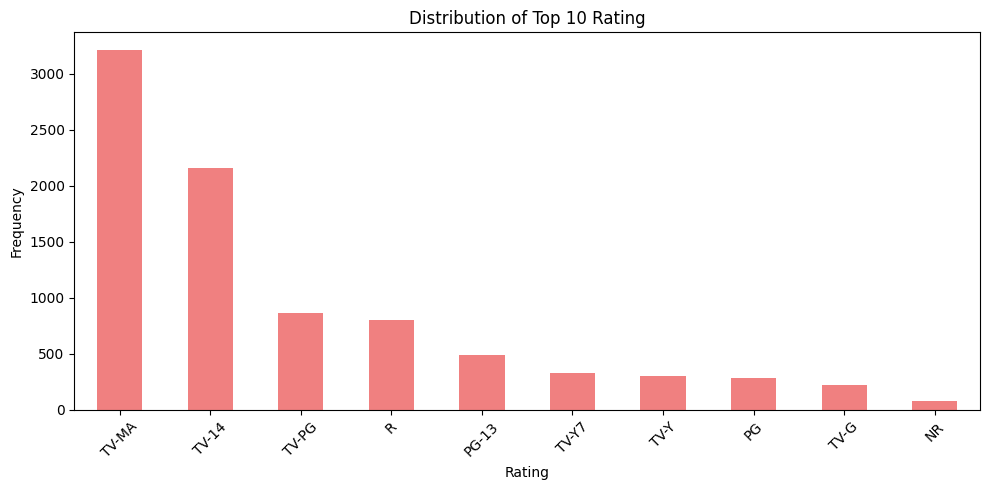


=== ANALYSIS OF COUNTRY ===

Top 10 Frequent Values:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


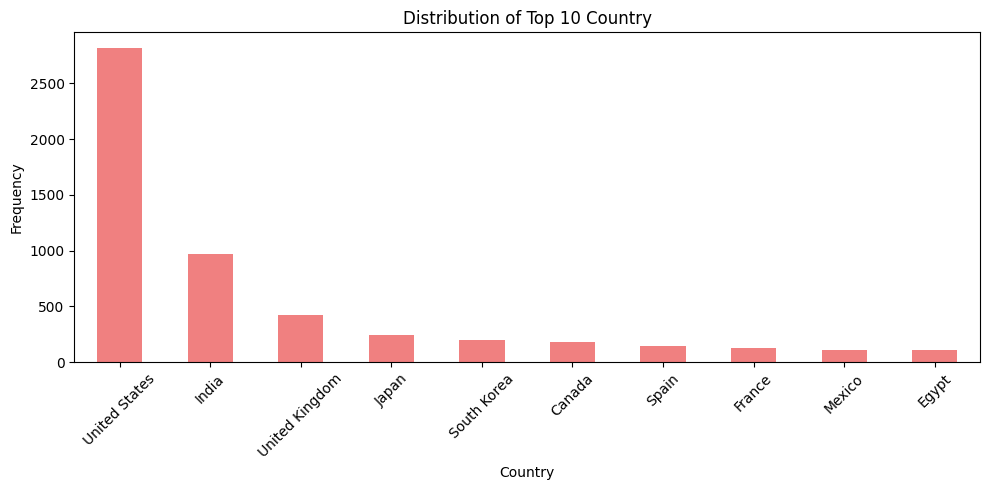


=== ANALYSIS OF DIRECTOR ===

Top 10 Frequent Values:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


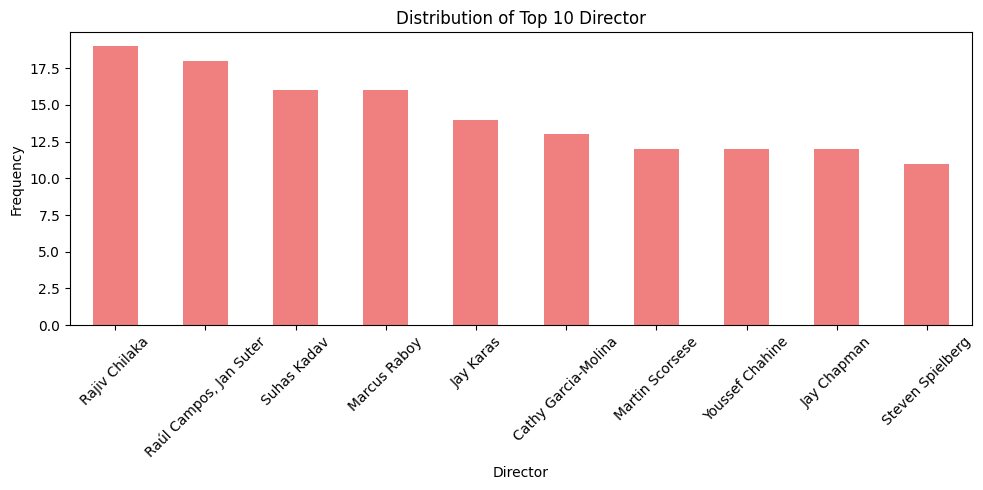


=== ANALYSIS OF LISTED_IN ===

Top 10 Frequent Values:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


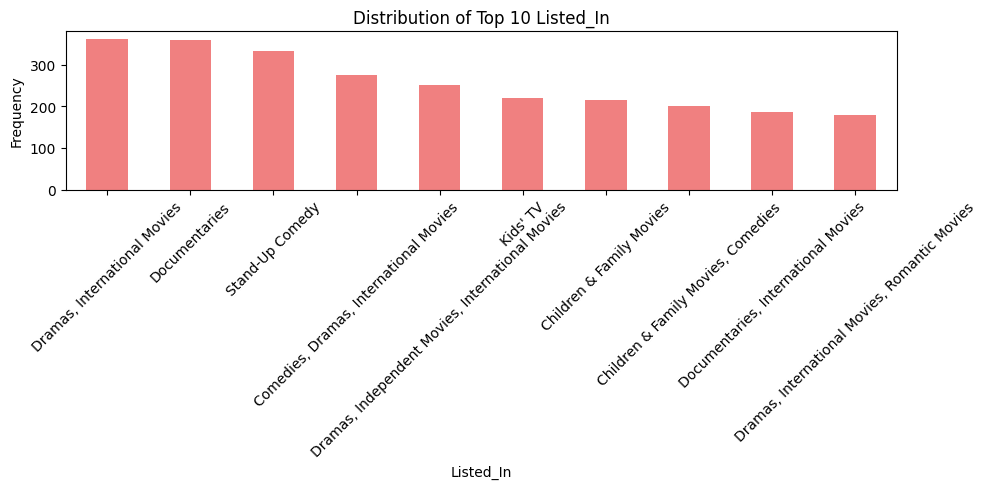


=== ANALYSIS OF CAST ===

Top 10 Frequent Values:
cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
David Spade, London Hughes, Fortune Feimster                                                                               6
Craig Sechler                                                                                                              6
Kevin Hart                                                           

/tmp/ipython-input-12-1102999655.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


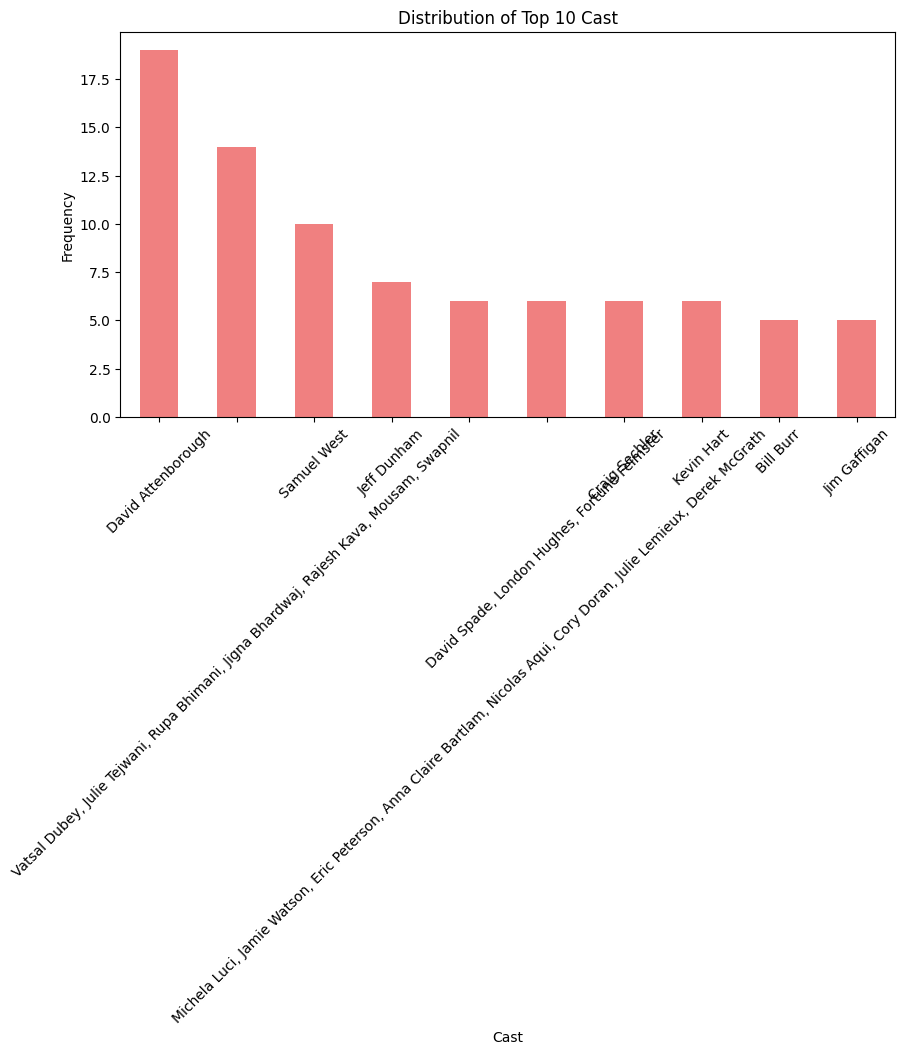

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('netflix.csv')
categories = ['rating', 'country', 'director', 'listed_in', 'cast']
for feature in categories:
    print(f"\n=== ANALYSIS OF {feature.upper()} ===")
    print("\nTop 10 Frequent Values:")
    top_values = data[feature].value_counts().nlargest(10)
    print(top_values)
    plt.figure(figsize=(10, 5))
    top_values.plot.bar(color='lightcoral')
    plt.title(f'Distribution of Top 10 {feature.title()}')
    plt.xlabel(feature.title())
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
top_movie_countries = df[df['type'] == 'Movie']['country'].value_counts().head(10)
print("Top 10 Movie Countries:\n", top_movie_countries)

top_tv_countries = df[df['type'] == 'TV Show']['country'].value_counts().head(10)
print("Top 10 TV Show Countries:\n", top_tv_countries)

Top 10 Movie Countries:
 country
[United States]      2058
[India]               893
[unknown country]     440
[United Kingdom]      206
[Canada]              122
[Spain]                97
[Egypt]                92
[Nigeria]              86
[Indonesia]            77
[Turkey]               76
Name: count, dtype: int64
Top 10 TV Show Countries:
 country
[United States]      760
[unknown country]    391
[United Kingdom]     213
[Japan]              169
[South Korea]        158
[India]               79
[Taiwan]              68
[Canada]              59
[France]              49
[Australia]           48
Name: count, dtype: int64


In [ ]:
import pandas as pd
import ast

df = pd.read_csv("netflix.csv")
df['director'] = df['director'].fillna("['unknown']")
df['director'] = df['director'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and '[' in x else [x])
df = df.explode('director')
df['director'] = df['director'].astype(str)

top_directors = df['director'].value_counts().head(10)
print(" Top 10 Directors:\n", top_directors)


🎬 Top 10 Directors:
 director
unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


In [ ]:
import pandas as pd
import ast
df = pd.read_csv("netflix.csv")
df.columns = df.columns.str.strip().str.lower()
df['cast'] = df['cast'].fillna("['unknown']")
df['cast'] = df['cast'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [x])
df = df.explode('cast')
df['cast'] = df['cast'].astype(str)
top_actors = df['cast'].value_counts().head(10)
print("🎭 Top 10 Actors:\n", top_actors)


🎭 Top 10 Actors:
 cast
unknown                                                                                                                   825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
David Spade, London Hughes, Fortune Feimster                                                                                6
Craig Sechler                                                                                  

🎨 Genre WordCloud Ready!


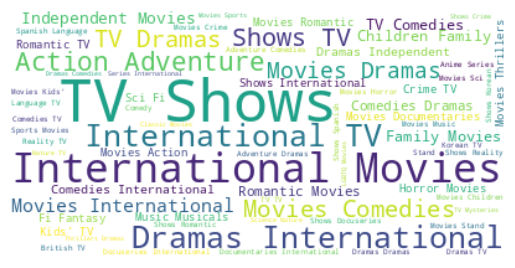

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_genres = ' '.join(df['listed_in'].dropna().astype(str).tolist())
print("Genre WordCloud Ready!")
plt.imshow(WordCloud(background_color='white').generate(all_genres), interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
m = pd.read_csv("netflix.csv").query("type=='Movie'")
d = (pd.to_datetime(m.date_added, errors="coerce") - pd.to_datetime(m.release_year, format="%Y", errors="coerce")).dt.days
d = int(d[(d > 0) & (d < 365*5)].mode()[0])
print(f"Most common delay: {d} days (~{d//30} months)\nLikely on: {(pd.Timestamp.today() + pd.Timedelta(d, 'D')).date()}")


Most common delay: 334 days (~11 months)
Likely on: 2026-06-10
